In [1]:
''' Henry Pacheco Cachon
    Created 01/15/2021 Last Modified 01/15/2021
    This is a demo of my nState library '''

import numpy as np
from sympy import *
from sympy.physics.quantum import *
import nStates as ns 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Initializing the symbols for our hamiltonian
dp, rabi01, rabi12, rabi13, dc, Delta23 = symbols('delta_p Omega_01 Omega_12 Omega_13 delta_c Delta_23')

# Initializing our hamiltonian array
H = np.array([[-dp, 1/2*rabi01, 0, 0],[1/2*rabi01, 0, 1/2*rabi12, 1/2*rabi13],[0, 1/2*rabi12, dc, 0],[0, 1/2*rabi13, 0, dc + Delta23]])

# Initializing the allowed transitions in our system
transitions = [(1,0),(2,1),(3,1)]

# Dictionary of parameters that we want to hold constant
static = {Symbol("Gamma_31") : 0.5, 
          Symbol("Gamma_21") : 0.25,
          rabi01 : 0.5,
          rabi12 : 3,
          rabi13 : 3,
          dp : 0,
          Delta23 : 5,
          Symbol('Gamma_10') : 6,
          Symbol('rho_00') : 1-Symbol('rho_11')-Symbol('rho_22')-Symbol('rho_33')}

# Initializing all of our static parameters and hamiltonian into the States class 
static = ns.States(numberStates=4, hamiltonian=H, staticDictionary=static)

In [10]:
# Creating our lindblad matrix with allowed transitions
static.lindbladMatrix(transitions,laser=False)

# Creating our density matrix
static.densityMatrix()

# Symbolically computing the 1/2*i[p,H] + L matrix
static.superMatrix()

# Extracting the density matrix equations from the super matrix
static.makeEquations()

M = static.changeParam([dc])

In [11]:
# Scanning over detuning values from -10 MHz to 10 MHz 
deltas = np.linspace(-30,30,500)
solutions = []

# This section scans over different detuning values 
for i in deltas:
    matrix = M(i)

    sols = static.solve(matrix)
    sols = [i[0] for i in sols]
    solutions.append(sols)

    
 

In [6]:
# Instead of making a ton of variables to make plotting easy, I am going to use a pandas data frame instead!
solutionsTable = static.makeDataFrame(solutionsArray=solutions)

In [7]:
# The other reason is because calculations are pretty straightforward with pandas
# An example would be calculating absorption which is given by
# I/I0 = exp(-kp*l*Im(rho_10))

# First, we pick out all the imaginary parts of our dataframe
imagDF = solutionsTable.apply(np.imag)

# Then we append a new column which contains our absorption
imagDF['Absorption'] = np.exp(-imagDF['rho_01'])
imagDF['Coupling Detunings'] = deltas

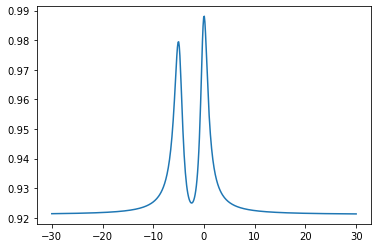

In [8]:
plt.plot(imagDF['Coupling Detunings'],imagDF['Absorption'])

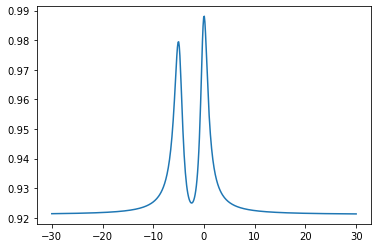

In [7]:
plt.plot(imagDF['Coupling Detunings'],imagDF['Absorption'])

In [13]:
# Initializing the symbols for our hamiltonian
dp, rabi01, rabi12, rabi13, dc, Delta23 = symbols('delta_p Omega_01 Omega_12 Omega_13 delta_c Delta_23')

# Initializing our hamiltonian array
H = np.array([[-dp, 1/2*rabi01, 0, 0],[1/2*rabi01, 0, 1/2*rabi12, 1/2*rabi13],[0, 1/2*rabi12, dc, 0],[0, 1/2*rabi13, 0, dc + Delta23]])

# Initializing the allowed transitions in our system
transitions = [(1,0),(2,1),(3,1)]

# Dictionary of parameters that we want to hold constant
static = {Symbol("Gamma_31") : 0.25, 
          Symbol("Gamma_21") : 0.5,
          rabi01 : 0.5,
          rabi12 : 3,
          rabi13 : 3,
          dp : 0,
          Delta23 : 5,
          Symbol('Gamma_10') : 6,
          Symbol('rho_00') : 1-Symbol('rho_11')-Symbol('rho_22')-Symbol('rho_33'),
          Symbol('gamma_p'): 1,
          Symbol('gamma_c'): 1}

# Initializing all of our static parameters and hamiltonian into the States class 
fourLevel = ns.States(numberStates=4, hamiltonian=H, staticDictionary=static)

In [14]:
# Creating our lindblad matrix with allowed transitions
fourLevel.lindbladMatrix(transitions,laser=True)

# Creating our density matrix
fourLevel.densityMatrix()

# Symbolically computing the 1/2*i[p,H] + L matrix
fourLevel.superMatrix()

# Extracting the density matrix equations from the super matrix
fourLevel.makeEquations()

M = fourLevel.changeParam([dc])

In [15]:
# Scanning over detuning values from -10 MHz to 10 MHz 
coupling = np.linspace(-50,50,601)
solutions1 = []

# This section scans over different detuning values 
for i in coupling:
    matrix = M(i)

    # Finally, we just solve our matrix problem
    # format it properly and append it to a 1-d array!
    sols = fourLevel.solve(matrix)
    sols = [i[0] for i in sols]
    solutions1.append(sols)

In [17]:
solutionsTable1 = fourLevel.makeDataFrame(solutionsArray=solutions1)

# First, we pick out all the imaginary parts of our dataframe
imagDF1 = solutionsTable1.apply(np.imag)

# Then we append a new column which contains our absorption
imagDF1['Absorption'] = np.exp(-imagDF1['rho_01'])
imagDF1['Coupling Detunings'] = coupling

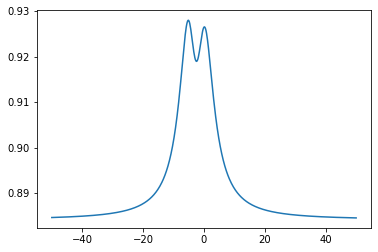

In [18]:
plt.plot(imagDF1['Coupling Detunings'],imagDF1['Absorption'])

In [13]:
imagDF1.to_csv('4levelSystemExp3-linewidth.csv',header=True)
imagDF.to_csv('4levelSystemExp3.csv',header=True)